# Vanilla embedding seq2seq experiment analysis, 2nd set of experiments

[Git commit](https://github.com/juditacs/morph-segmentation-experiments/commit/1f58181d92286878db5823569ac19ec69b7b3792)
## Experimental setup

* dataset: Hungarian Webcorpus segmented using the output of HuNLP-Gate
  * segmentation converted to standoff tagging using two tags: B (beginning morpheme), E (continuation of morpheme)
* architecture: embedding seq2seq with a single LSTM/GRU layer
* 200000 unique words-segmentation pairs were used
* fixed parameters: `batch_size`=1000
* early stopping: `validation split=0.1`, `patienc=10`, `val_loss_epsilon=1e-2`
* varying parameters uniformly sampled from these ranges:
 
| Parameter | Range |
| --- | --- |
| cell type | `['LSTM', 'GRU']` |
| cell size | `[16, 32, 64, 128, 256, 512, 1024, 2048]` | 
| embedding size | `range(2, 30)` |

### Misc

* each output is prefixed with a GO symbol, but no END symbol is used (maybe I should have used one?)

In [15]:
import pandas as pd
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (10, 7)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'

In [16]:
results = pd.read_table('../results/webcorp.tagset_BE.layer_1.sample_200000_exp2.tsv')
results.tail()

,conf.cell_size,conf.cell_type,conf.embedding_size,data.dec_shape,data.enc_shape,data.label_counts,data.length_limit,data.test_dec_shape,data.test_enc_shape,data.train_dec_shape,data.train_enc_shape,data.val_dec_shape,data.val_enc_shape,result.epochs_run,result.patience,result.running_time,result.test_loss,result.train_loss,result.val_loss,result.val_loss_th
1801,64.0,GRU,17.0,"(200000, 11)","(200000, 10)","{'E': 1099937, 'B': 455775, 'GO': 200000, 'PAD...",10,"(20109, 11)","(20109, 10)","(159979, 11)","(159979, 10)","(19912, 11)","(19912, 10)",125.0,10.0,8.463373,5.928728,0.002008,5.920024,0.01
1802,128.0,GRU,2.0,"(200000, 11)","(200000, 10)","{'E': 1099937, 'B': 455775, 'GO': 200000, 'PAD...",10,"(20109, 11)","(20109, 10)","(159979, 11)","(159979, 10)","(19912, 11)","(19912, 10)",117.0,10.0,11.140123,3.365416,0.002534,3.361622,0.01
1803,32.0,LSTM,20.0,"(200000, 11)","(200000, 10)","{'E': 1099937, 'B': 455775, 'GO': 200000, 'PAD...",10,"(20109, 11)","(20109, 10)","(159979, 11)","(159979, 10)","(19912, 11)","(19912, 10)",133.0,10.0,6.332430,4.810430,0.009308,4.800393,0.01
1804,32.0,LSTM,18.0,"(200000, 11)","(200000, 10)","{'E': 1099937, 'B': 455775, 'GO': 200000, 'PAD...",10,"(20109, 11)","(20109, 10)","(159979, 11)","(159979, 10)","(19912, 11)","(19912, 10)",91.0,10.0,4.421916,3.664111,0.015847,3.667831,0.01
1805,32.0,GRU,21.0,"(200000, 11)","(200000, 10)","{'E': 1099937, 'B': 455775, 'GO': 200000, 'PAD...",10,"(20109, 11)","(20109, 10)","(159979, 11)","(159979, 10)","(19912, 11)","(19912, 10)",110.0,10.0,5.878537,5.590149,0.003468,5.581711,0.01


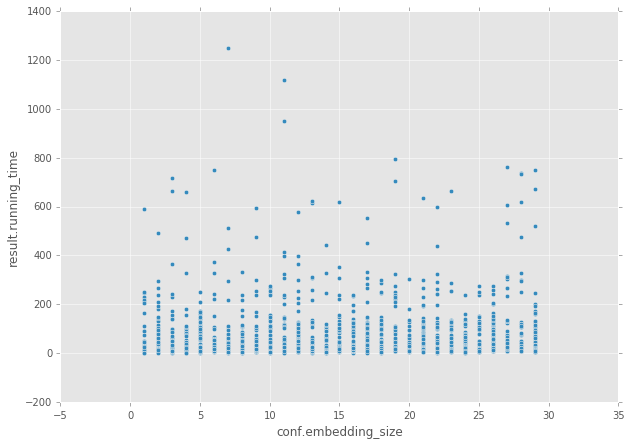

In [17]:
#results['result.running_time'].hist()
results.plot(x='conf.embedding_size', y='result.running_time', kind='scatter')

# Best config (lowest test loss)

In [18]:
results.loc[results['result.test_loss'].argmin()]

conf.cell_size                                                        512
conf.cell_type                                                        GRU
conf.embedding_size                                                    16
data.dec_shape                                              (200000, 118)
data.enc_shape                                              (200000, 117)
data.label_counts       {'B': 557404, 'E': 1488310, 'PAD': 21354286, '...
data.length_limit                                                       0
data.test_dec_shape                                          (20030, 118)
data.test_enc_shape                                          (20030, 117)
data.train_dec_shape                                        (159819, 118)
data.train_enc_shape                                        (159819, 117)
data.val_dec_shape                                           (20151, 118)
data.val_enc_shape                                           (20151, 117)
result.epochs_run                     

## Limiting the length of input and output sequences

In [19]:
results.loc[results[results['data.length_limit'] > 0]['result.test_loss'].argmin()]

conf.cell_size                                                        256
conf.cell_type                                                        GRU
conf.embedding_size                                                     1
data.dec_shape                                               (200000, 16)
data.enc_shape                                               (200000, 15)
data.label_counts       {'PAD': 1075393, 'E': 1390571, 'B': 534036, 'G...
data.length_limit                                                      15
data.test_dec_shape                                           (19870, 16)
data.test_enc_shape                                           (19870, 15)
data.train_dec_shape                                         (160405, 16)
data.train_enc_shape                                         (160405, 15)
data.val_dec_shape                                            (19725, 16)
data.val_enc_shape                                            (19725, 15)
result.epochs_run                     

In [20]:
results.loc[results.groupby('data.length_limit')['result.test_loss'].idxmin()]

,conf.cell_size,conf.cell_type,conf.embedding_size,data.dec_shape,data.enc_shape,data.label_counts,data.length_limit,data.test_dec_shape,data.test_enc_shape,data.train_dec_shape,data.train_enc_shape,data.val_dec_shape,data.val_enc_shape,result.epochs_run,result.patience,result.running_time,result.test_loss,result.train_loss,result.val_loss,result.val_loss_th
125,512.0,GRU,16.0,"(200000, 118)","(200000, 117)","{'B': 557404, 'E': 1488310, 'PAD': 21354286, '...",0,"(20030, 118)","(20030, 117)","(159819, 118)","(159819, 117)","(20151, 118)","(20151, 117)",42.0,10.0,234.054403,0.099575,0.059940,0.100554,0.01
1766,16.0,GRU,1.0,"(200000, 11)","(200000, 10)","{'E': 1099937, 'B': 455775, 'GO': 200000, 'PAD...",10,"(20109, 11)","(20109, 10)","(159979, 11)","(159979, 10)","(19912, 11)","(19912, 10)",28.0,10.0,1.117940,0.851627,0.838258,0.851686,0.01
538,256.0,GRU,1.0,"(200000, 16)","(200000, 15)","{'PAD': 1075393, 'E': 1390571, 'B': 534036, 'G...",15,"(19870, 16)","(19870, 15)","(160405, 16)","(160405, 15)","(19725, 16)","(19725, 15)",53.0,10.0,15.812958,0.412263,0.404232,0.409734,0.01
1196,64.0,LSTM,1.0,"(200000, 26)","(200000, 25)","{'GO': 200000, 'E': 1485572, 'B': 556825, 'PAD...",25,"(20098, 26)","(20098, 25)","(159858, 26)","(159858, 25)","(20044, 26)","(20044, 25)",35.0,10.0,5.951293,0.455391,0.456617,0.458025,0.01


In [21]:
results.groupby('data.length_limit').size()

data.length_limit
0     207
10     88
15    696
25    815
dtype: int64

## Cell type

it does not seem to matter very much

In [22]:
results.groupby('conf.cell_type').describe()

conf.cell_size  conf.embedding_size  data.length_limit  \
conf.cell_type                                                                 
GRU            count      893.000000           893.000000         893.000000   
               mean       150.898096            14.930571          17.368421   
               std        165.494028             8.396942           8.161472   
               min         16.000000             1.000000           0.000000   
               25%         32.000000             8.000000          15.000000   
               50%         64.000000            15.000000          15.000000   
               75%        256.000000            22.000000          25.000000   
               max        512.000000            29.000000          25.000000   
LSTM           count      913.000000           913.000000         913.000000   
               mean       171.338445            14.733844          17.727273   
               std        175.748226             8.251151           8.047222   
               min         16.000000             1.000000           0.000000   
               25%         32.000000             8.000000          15.000000   
               50%        128.000000            15.000000          15.000000   
               75%        256.000000            22.000000          25.000000   
               max        512.000000            29.000000          25.000000   

                      result.epochs_run  result.patience  result.running_time  \
conf.cell_type                                                                  
GRU            count         893.000000            893.0           893.000000   
               mean          129.374020             10.0            55.667701   
               std            42.854366              0.0            99.060463   
               min            17.000000             10.0             1.047810   
               25%           104.000000             10.0            11.344814   
               50%           124.000000             10.0            21.233293   
               75%           148.000000             10.0            59.488672   
               max           372.000000             10.0          1117.586323   
LSTM           count         913.000000            913.0           913.000000   
               mean          140.304491             10.0            74.923858   
               std            53.498948              0.0           119.103936   
               min            16.000000             10.0             0.908107   
               25%           108.000000             10.0            14.803573   
               50%           145.000000             10.0            26.197130   
               75%           173.000000             10.0            97.213772   
               max           486.000000             10.0          1247.378381   

                      result.test_loss  result.train_loss  result.val_loss  \
conf.cell_type                                                               
GRU            count        893.000000         893.000000       893.000000   
               mean           4.189873           0.017848         4.190781   
               std            1.669567           0.070592         1.669044   
               min            0.099575           0.001121         0.100554   
               25%            3.474796           0.002626         3.472355   
               50%            4.381539           0.003806         4.385377   
               75%            5.174995           0.006471         5.178844   
               max           11.529238           0.995807        11.522448   
LSTM           count        913.000000         913.000000       913.000000   
               mean           3.984506           0.043467         3.985318   
               std            1.516685           0.115941         1.516299   
               min            0.118685           0.001123         0.118364   
               25%            

## Embedding size

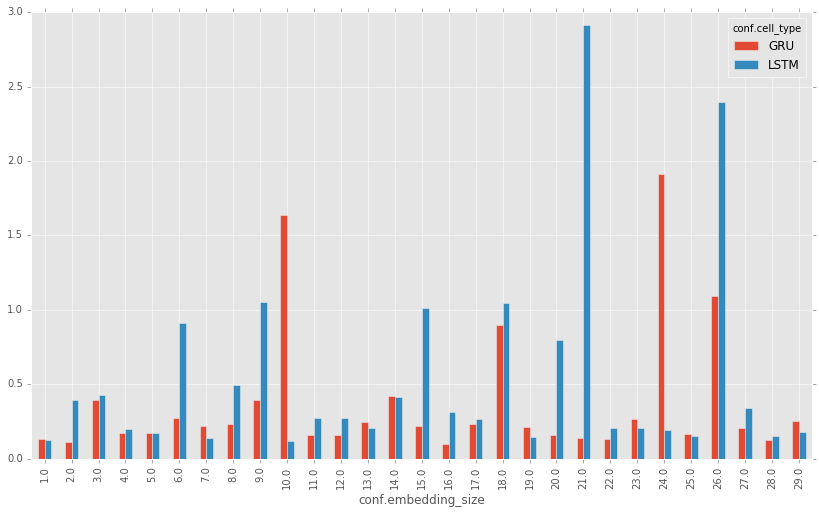

In [23]:
results.groupby(['conf.embedding_size', 'conf.cell_type']).min().unstack(
    'conf.cell_type').plot(y='result.test_loss', kind='bar', figsize=(14, 8))

In [24]:
results.groupby(['conf.embedding_size', 'conf.cell_type']).size()

conf.embedding_size  conf.cell_type
1.0                  GRU               35
                     LSTM              27
2.0                  GRU               37
                     LSTM              29
3.0                  GRU               30
                     LSTM              35
4.0                  GRU               27
                     LSTM              37
5.0                  GRU               34
                     LSTM              30
6.0                  GRU               22
                     LSTM              31
7.0                  GRU               28
                     LSTM              36
8.0                  GRU               24
                     LSTM              32
9.0                  GRU               32
                     LSTM              22
10.0                 GRU               33
                     LSTM              49
11.0                 GRU               39
                     LSTM              36
12.0                 GRU               3

## Cell size

Larger cell size than 512 seems to run out of memory.

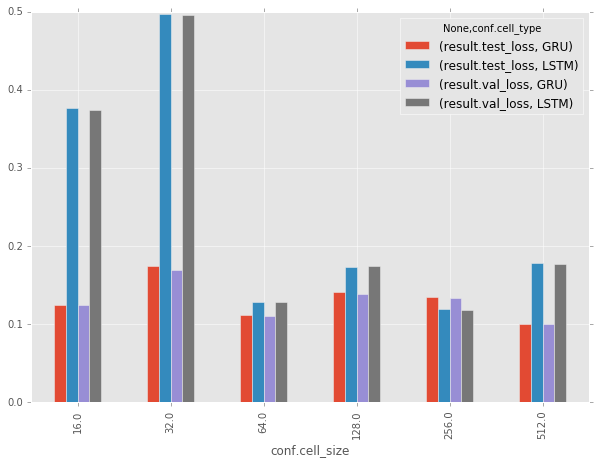

In [25]:
results.groupby(['conf.cell_type', 'conf.cell_size']).min().unstack('conf.cell_type').plot(
    y=['result.test_loss', 'result.val_loss'], kind='bar', figsize=(10, 7))

## Epoch number

Let's see how early stopping affects the number of epochs.

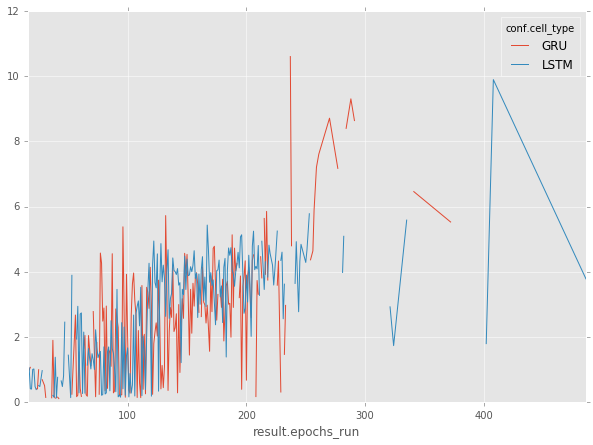

In [26]:
results.groupby(['conf.cell_type', 'result.epochs_run']).min().unstack('conf.cell_type').plot(
    y='result.test_loss', figsize=(10, 7))

# Val loss vs. test loss

In [27]:
results['val_test_diff'] = results['result.val_loss'] - results['result.test_loss']
results['val_test_diff'].describe()

count    1806.000000
mean        0.000859
std         0.008824
min        -0.088862
25%        -0.002517
50%         0.001386
75%         0.004581
max         0.052952
Name: val_test_diff, dtype: float64

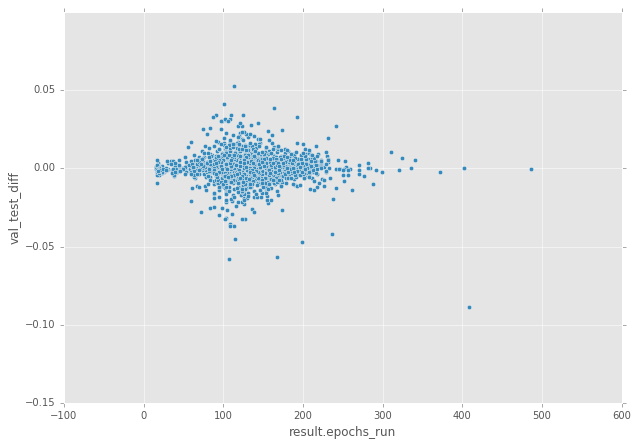

In [28]:
results.plot(x='result.epochs_run', y='val_test_diff', kind='scatter')